# **패션MNIST**
*패션MNIST: 28*28의 흑백 패션 이미지 데이터 6만개를 10개의 클래스로 나눈 데이터셋

In [2]:
from tensorflow import keras

#keras.datasets.fashion_mnist패키지 하위의  load_data() 메소드는 다운한 패션MNIST 패키지를 
#(훈련 세트 쌍(훈련 인풋셋, 훈련 타깃셋)),(테스트 세트 쌍(테스트 인풋셋, 테스트 타깃셋))으로 변환해 반환한다.
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [3]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [4]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


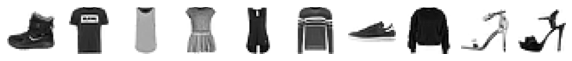

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [6]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [7]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


**로지스틱 회귀로 패션 아이템 분류하기**

In [8]:
#픽셀값은 0~255의 정수값이므로 따로 표준화 할 필요없이 255로 나누어줘도 된다.
train_scaled = train_input / 255.0
#픽셀 배열 펼치기
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


In [22]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

#경사하강법을 사용한 로지스틱 회귀
sc = SGDClassifier(loss='log', max_iter=10)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8265833333333333


[5]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


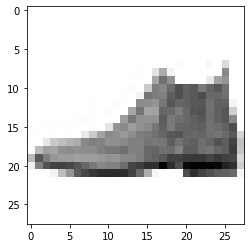

In [29]:
#예측해보기
sc.fit(train_scaled, train_target)
t = test_input[0]/255.0
t_scaled = t.reshape(28*28)
print(sc.predict(np.array([t_scaled])))
plt.imshow(t*255, cmap='gray_r')

# **인공신경망**(딥러닝)

In [30]:
#인공신경망 패키지인 텐서플로우와 하위의 케라스를 사용한다.
import tensorflow as tf
from tensorflow import keras

In [34]:
from sklearn.model_selection import train_test_split

#훈련세트를 훈련세트와 검증세트로 다시 나눔
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2)

#10개의 뉴런을 가지고 활성화 함수를 소프트맥스 함수를 사용하는 Dense층을 구성
#Dense층은 keras모델의 가장 기본이 되는 모델로, 인풋 레이어의 모든 뉴런과 연결되기 때문에 밀집층, 또는 완전연결층 등으로 불린다.
#보통 다중분류에선 소프트맥스 함수, 이진분류에선 시그모이드('sigmoid')함수를 사용한다.('로지스틱 회귀'참고)
#input_shape:입력받을 데이터의 형태를 지정
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
#만들어진 덴스층을 Sequential메서드의 인자로 주어 모델을 구성한다.
model = keras.Sequential(dense)

**모델설정**

In [41]:
#compile메소드로 모델의 세부사항을 지정한다.
#loss:손실함수를 지정한다. 케라스에선 이진분류일땐 'binary_crossentropy', 다중분류일땐 'categorical_crossentropy'를 사용한다.
#단, 일반적인 정수배열을 사용해 다중분류를 학습할때는 'sparse_categorical_crossentropy'를 사용한다.
#metrics:결과에서 측정지표를 추가할때 사용한다. 아래에선 'accuracy', 즉 정확도를 추가한 것을 볼 수 있다.
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
#epochs: 학습 횟수
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
960/960 [==============================] - 1s 1ms/step - loss: 0.3914 - accuracy: 0.8729
Epoch 2/5
960/960 [==============================] - 1s 1000us/step - loss: 0.3759 - accuracy: 0.8778
Epoch 3/5
960/960 [==============================] - 1s 1ms/step - loss: 0.3792 - accuracy: 0.8738
Epoch 4/5
960/960 [==============================] - 1s 1ms/step - loss: 0.3969 - accuracy: 0.8715
Epoch 5/5
960/960 [==============================] - 1s 988us/step - loss: 0.3825 - accuracy: 0.8752


In [40]:
#검증
model.evaluate(val_scaled, val_target)

240/240 [==============================] - 0s 824us/step - loss: 0.4859 - accuracy: 0.8464


[0.4859204590320587, 0.8463541865348816]